In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
DIRECTORY = './data/'
categories = pd.read_csv(DIRECTORY + 'item_categories.csv')
items = pd.read_csv(DIRECTORY + 'items.csv')
shops = pd.read_csv(DIRECTORY + 'shops.csv')
train = pd.read_csv(DIRECTORY + 'sales_train.csv')
test = pd.read_csv(DIRECTORY + 'test.csv')

# Q1.  Explore whether items have previous sales

In [26]:
train['parsed_date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
train['month_year'] = train['parsed_date'].dt.to_period('M')
date_train = train.set_index('parsed_date')
date_train = date_train.sort_index()

month_group = train.groupby(by=['item_id', 'month_year'])['item_cnt_day'].sum().to_frame('times_sold').reset_index()
month_group = month_group.sort_values(by=['item_id', 'month_year'])
month_group['last_purchase'] = month_group.groupby(by='item_id')['month_year'].shift(1)
month_group['time_since_last'] = (month_group['month_year'].astype('int64') - month_group['last_purchase'].astype('int64'))
month_group['time_since_last'] = np.where(month_group['time_since_last'] < 0, 100, month_group['time_since_last'])

month_group.head()

,item_id,month_year,times_sold,last_purchase,time_since_last
0,0,2014-09,1.0,NaT,100
1,1,2014-04,2.0,NaT,100
2,1,2014-07,1.0,2014-04,3
3,1,2014-08,1.0,2014-07,1
4,1,2014-09,1.0,2014-08,1


/var/folders/_c/j62lsd3n7x9_vq272kdsl3fc0000gn/T/ipykernel_67030/3459401335.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = filtered_month.groupby(['month_year', 'bins']).size().unstack()


Text(0.5, 1.0, 'When items w/ sales this month LAST had sales')

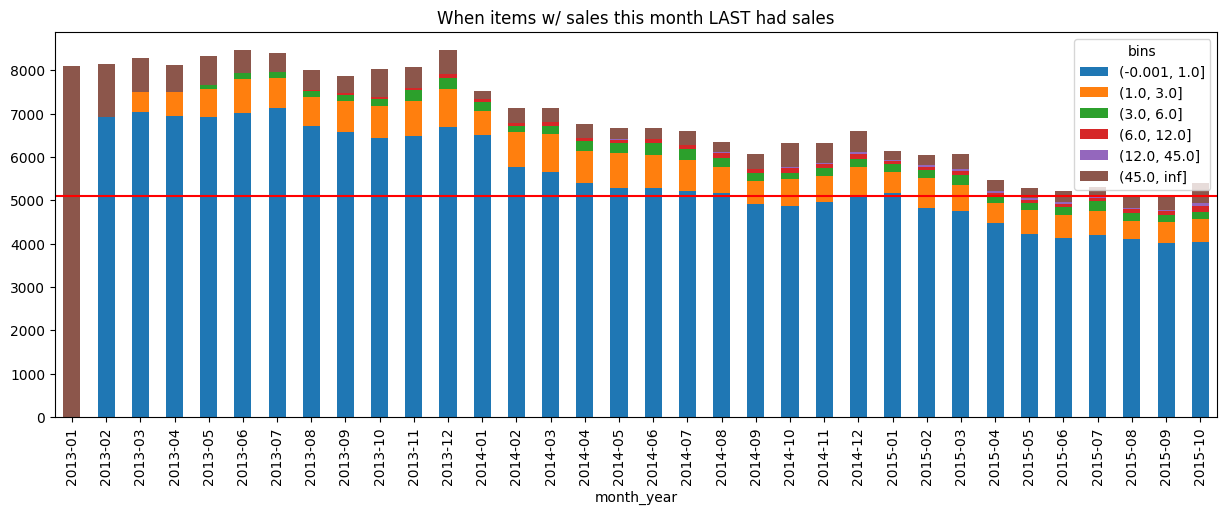

In [25]:
month_group['bins'] = pd.cut(month_group['time_since_last'], bins=[0,1,3,6,12, 45,np.inf], include_lowest=True)
filtered_month = month_group[month_group['times_sold'] > 0]

# sns.countplot(data = filtered_month[['month_year', 'bins']], x='month_year', y='bins')
bin_counts = filtered_month.groupby(['month_year', 'bins']).size().unstack()


bin_counts.plot(kind='bar', stacked=True, figsize=(15,5))
plt.axhline(y=5100, color='red')
plt.title('When items w/ sales this month LAST had sales')

/var/folders/_c/j62lsd3n7x9_vq272kdsl3fc0000gn/T/ipykernel_67030/1823662287.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  month_group.pivot_table(index='month_year', columns='bins', values='times_sold', aggfunc='sum').plot(kind='bar', stacked=True, figsize=(15,10))


Text(0.5, 1.0, 'Items sales this month grouped by when they LAST had sales')

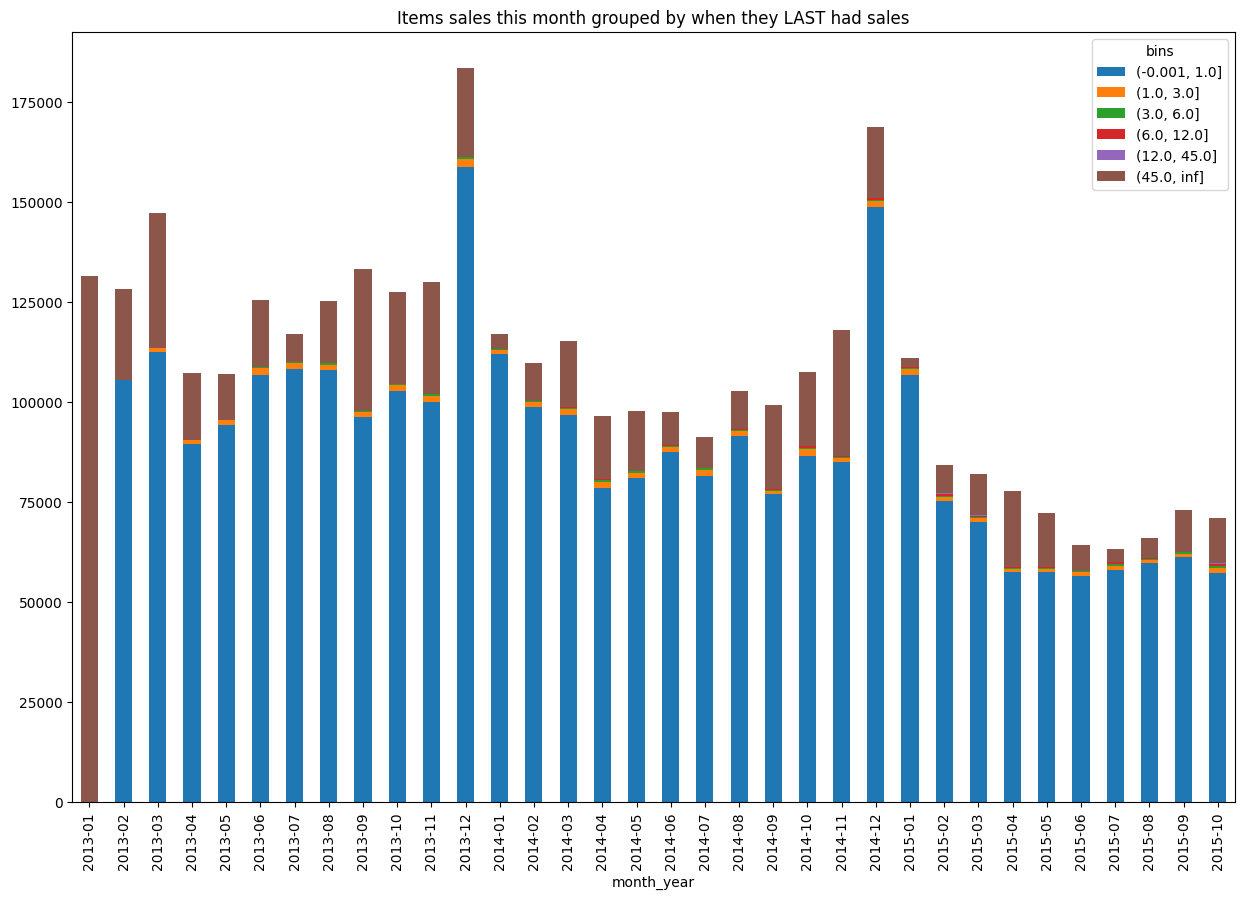

In [7]:
# Check avg. sales per item (by bin)

month_group.pivot_table(index='month_year', columns='bins', values='times_sold', aggfunc='sum').plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('Items sales this month grouped by when they LAST had sales')